<a href="https://colab.research.google.com/github/fpv5026/FinalProjectDataAnalysis/blob/main/FinalProjectDS200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import utils
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
import matplotlib.patches as mpatches
import seaborn as sns

# Import Gaussian Naive Bayes classifier:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Import Needed for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

In [47]:
#https://drive.google.com/file/d/1Z75c0utrRQ8dqxs6lnJFCPlFwYMI6En1/view?usp=sharing link to dataset
my_path = "/content/drive/MyDrive/Colab Notebooks/Dataset_EEG.csv"

#Background

For this project, I will be analyzing an EEG dataset from a study done on four drivers who wore a wearable helmet. Each driver wore the helmet for 5-8 minutes for each label (Sleepy, Attentive). I am interested in this dataset because I will be working with this dataset over the summer for Kennesaw State's Non-Invasive Deep Brain Computer Interface REU. Therefore, I was able to obtain this dataset from my mentor Dr. Zhao who allowed me to use this dataset for this project.

In the study done, researchers were able to record the following variables: attention, meditation, delta, theta, low alpha, high alpha, low beta, high beta, low gamma, and high gamma. We will see when we delve into the EDA part that there are 3735 rows with eleven columns. The eleventh column is the classification column, where drivers are either classified as sleepy: 0 or Attentive: 1. Since each row is a timestamp for one of the four drivers, variables are representative of the signals acquired approximately every second.

Going into this analysis, we must understand that there could be a subject effect bias represented in this daset. This is because the researchers only looked at four drivers. There could be confounding factors that cause a driver to respond a certain way to the helmet, which will effect the signals recorded by the helmet.

With this in mind, let us start by answersing questions about the relationships between the variables and their classification seen in this dataset.

#Research Questions
We intend on addressing these questions through investigation and analysis:

*1. Is there a correlation between specific waves?*

*2. What does the relationship between Theta and High Beta Waves look like?*

*3. What does the relationship between Low Alpha Waves and Low Beta Waves look like?*

*4. Do drivers who are classified as sleepy have lower High Alpha Waves than drivers who are classified as attentive?*

*5. How accurately can you classify whether a driver is Sleepy or Attentive?*

#Exploratory Data Analysis

Throughout this lab, we will be using the pandas (pd)  and represents datasets with the DataFrame type.

We will start our analysis by creating a Dataframe type called `driving` that reads the csv file and another copy called `dummy`. Then, we can get the first 10 rows by using the command `driving.head(11)`, the number of total rows using `driving.shape`, and the name of all the columns using `driving.columns`.

In [4]:
dummy = pd.read_csv(my_path)
driving = pd.read_csv(my_path)
driving.head(11)

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0
5,69,54,95733,97816,22747,34873,22747,6898,7549,2603,0
6,57,67,38504,63547,48293,33267,48293,10078,2279,2055,0
7,56,77,57266,16194,22614,10379,22614,14633,8335,3583,0
8,51,70,1058339,117892,78062,23730,78062,18370,9872,9777,0
9,41,60,1734126,624883,86403,29780,86403,14859,8577,11765,0


In [5]:
driving.shape

(3735, 11)

In [6]:
driving.columns

Index(['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha',
       'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification'],
      dtype='object')

Next, we can check if the values are numberical. Then, we can use `driving.info()` to determine the data types of each column. After this, we can start the data cleaning process.

In [7]:
num_cols = driving.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_cols)

Numerical Variables:
['attention', 'meditation', 'delta', 'theta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma', 'highGamma', 'classification']


In [8]:
driving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   attention       3735 non-null   int64
 1   meditation      3735 non-null   int64
 2   delta           3735 non-null   int64
 3   theta           3735 non-null   int64
 4   lowAlpha        3735 non-null   int64
 5   highAlpha       3735 non-null   int64
 6   lowBeta         3735 non-null   int64
 7   highBeta        3735 non-null   int64
 8   lowGamma        3735 non-null   int64
 9   highGamma       3735 non-null   int64
 10  classification  3735 non-null   int64
dtypes: int64(11)
memory usage: 321.1 KB


When cleaning the dataset, we must start by checking if the dataset has any duplicates or if there are any null values for each column.

In [9]:
#Checks for duplicates
driving.duplicated().sum()

0

In [10]:
#Checks for null values
driving.isnull().sum()

attention         0
meditation        0
delta             0
theta             0
lowAlpha          0
highAlpha         0
lowBeta           0
highBeta          0
lowGamma          0
highGamma         0
classification    0
dtype: int64

Since there are no duplicates or null values, we can continue by using the `driving.describe().T` to describe the distribution of each of the varaibles. We see that we do this by looking at the mean, std, min, max, and quartiles (25%, 50%, 75%).

In [11]:
driving.describe().T

,count,mean,std,min,25%,50%,75%,max
attention,3735.0,48.214726,21.876949,1.0,35.0,48.0,63.0,100.0
meditation,3735.0,56.577510,19.066577,1.0,43.0,56.0,69.0,100.0
delta,3735.0,518771.389290,599783.663336,216.0,71996.5,277382.0,778068.0,3598743.0
theta,3735.0,136242.001874,217550.078075,138.0,23472.0,57972.0,151485.5,3194358.0
lowAlpha,3735.0,33413.343775,51970.930842,32.0,7402.0,16481.0,37721.5,699008.0
highAlpha,3735.0,30580.759036,52681.858764,9.0,6908.5,14928.0,33147.5,785947.0
lowBeta,3735.0,25640.069076,37159.039642,2.0,6240.0,13841.0,30236.0,595549.0
highBeta,3735.0,23276.979384,43921.116122,3.0,4862.0,9739.0,20796.5,443589.0
lowGamma,3735.0,8117.130388,15522.904383,6.0,2247.0,4440.0,8813.0,289281.0
highGamma,3735.0,208725.809906,329707.322778,47.0,5683.0,57198.0,257687.5,2328370.0


Since we cleansed the dataset and determined the distribution, we can start answering our research questions.





#Question 1

The first question we asked was if there was a correlation between the variables depicted in our dataset. Notice that we could use start graphing two variables against each other and use the `.corr()` to find the correlation. However, this will take a while since we have eleven varaibles. Because of this, we can determine the correlations using a heatmap graph. This map will plot all the the variables correlations against each other.

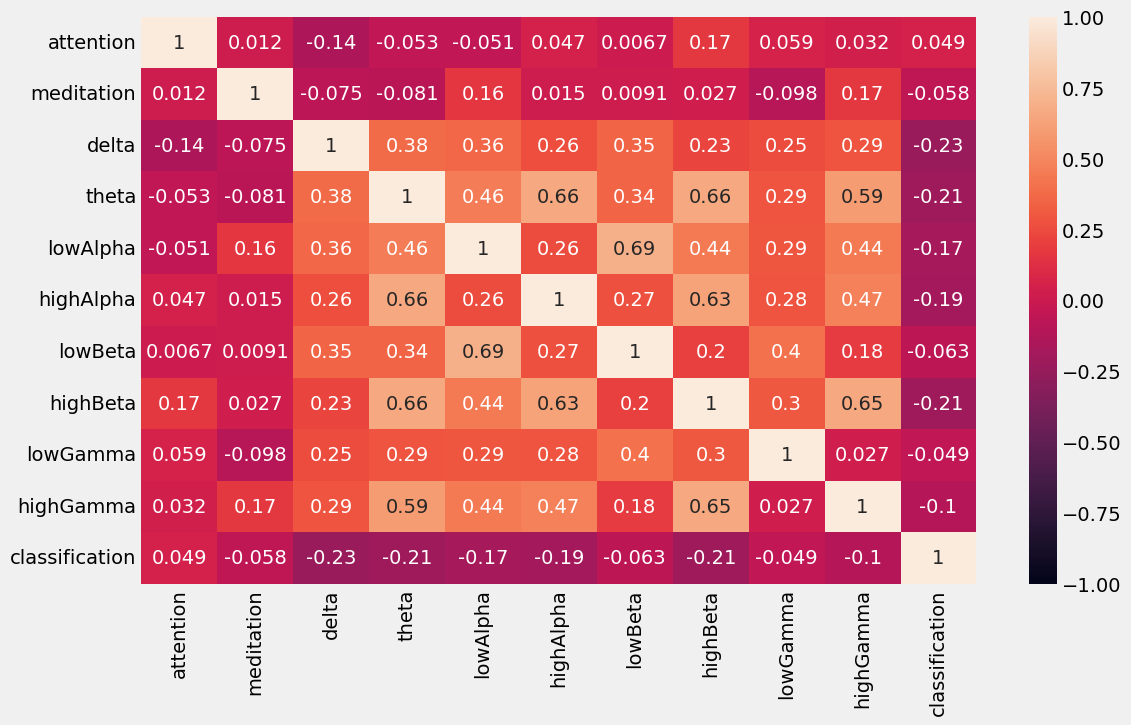

In [12]:
plt.figure(figsize=(12, 7))
sns.heatmap(driving.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

Looking at the heatmap, the strongest correlations are between Low Alpha vs. Low Beta and Low Beta vs. Low Alpha. Still, notice that the strongest correlation is 0.69. The lowest correlation is between Attention vs. High Beta and Low Beta vs. Attention. The lowest correlation is 0.0067.

#Question 2

The second question asks what the relationship between Theta and High Beta Waves look like.

Theta: Theta waves occur during light sleep, deep meditation, and REM (Rapid Eye Movement) sleep. They are linked to creativity, intuition, daydreaming, and fantasizing. Theta states are often associated with subconscious mind activities.

Beta: Beta waves dominate our normal waking state of consciousness when attention is directed towards cognitive tasks and the outside world. They are associated with active, busy or anxious thinking and active concentration.

In order to compare two variables, we need to start my standardizing the units. We can standardize by taking a given value and subtracting it by the mean and dividing that number by the standard deviation.

Once we standardize, notice that the distributions of High Beta and Theta change.

We can compare the standardized scatter plot to the unstandardized plot. The unstandardized plot is shown by plotting the `dummy` copy we made. Notice that I changed the hue of the scatter plot depending on if High Beta and Theta is classified as sleepy or attentive. Attentive is 1 (red) and Sleepy is 0 (blue).



In [13]:
#Standardize the all the variables we want to analyze
driving['highBeta'] =( driving['highBeta'] - driving['highBeta'].mean() ) / driving['highBeta'].std()
driving['theta'] =( driving['theta'] - driving['theta'].mean() ) / driving['theta'].std()

In [14]:
#Descriptive Statistics
deshighBeta = driving['highBeta'].describe()
deshighBetaDF = pd.DataFrame(deshighBeta).transpose()
deshighBetaDF

,count,mean,std,min,25%,50%,75%,max
highBeta,3735.0,-1.521912e-17,1.0,-0.529904,-0.419274,-0.308234,-0.056476,9.569703


In [15]:
#Descriptive Statistics
destheta = driving['theta'].describe()
desthetaDF = pd.DataFrame(destheta).transpose()
desthetaDF

,count,mean,std,min,25%,50%,75%,max
theta,3735.0,6.848605e-17,1.0,-0.625621,-0.518363,-0.359779,0.070069,14.057067


<Axes: xlabel='theta', ylabel='highBeta'>

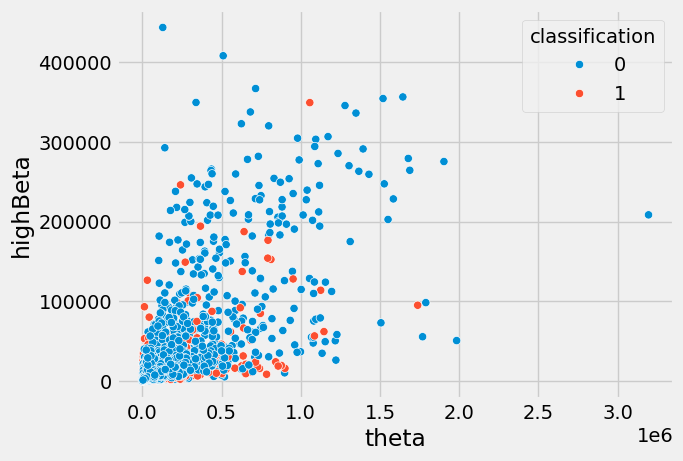

In [16]:
# @title Unstandardized Theta vs High Beta Waves
sns.scatterplot(x = dummy.theta, y = dummy.highBeta, hue = dummy.classification)

<Axes: xlabel='theta', ylabel='highBeta'>

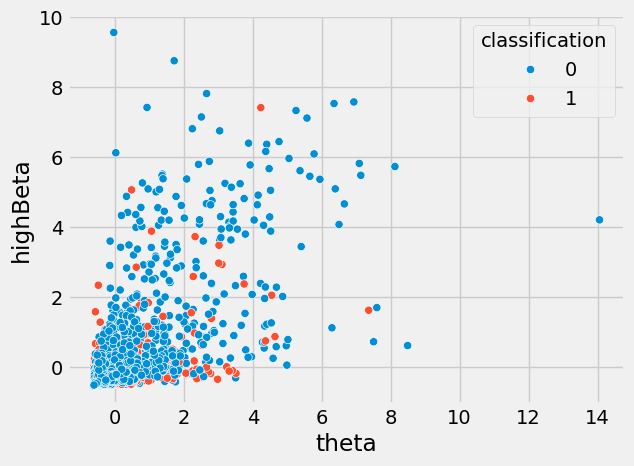

In [17]:
# @title Theta vs High Beta Waves
sns.scatterplot(x = driving.theta, y = driving.highBeta, hue = driving.classification)

Notice that there is a positive association/relationship between High Beta and Theta. We also know that the correlation is 0.66. This means that there is association between anxious thinking (High Beta) and subconscious mind activities (Theta). Therefore, this correlation makes sense given the context.

In [18]:
#Correlation between High Beta and Theta
driving['highBeta'].corr(driving['theta'])

0.66360774680525

#Question 3

In the next question, we can ask is what the relationship between Low Alpha Waves and Low Beta Waves look like. In order to do this, we do the same process at question2.

Alpha: Alpha waves are present during physically and mentally relaxed states but still alert. They are typical in wakeful states that involve a relaxed and effortless alertness. Alpha waves aid in mental coordination, calmness, alertness, and learning.

We standardize Low Alpha and Low Beta and watch as their distributions change. Then, we create a scatter plot of their relationship.

In [19]:
#Standardize the all the variables we want to analyze
driving['lowBeta'] =( driving['lowBeta'] - driving['lowBeta'].mean() ) / driving['lowBeta'].std()
driving['lowAlpha'] =( driving['lowAlpha'] - driving['lowAlpha'].mean() ) / driving['lowAlpha'].std()

In [20]:
#Descriptive Statistics
destheta = driving['lowBeta'].describe()
desthetaDF = pd.DataFrame(destheta).transpose()
desthetaDF

,count,mean,std,min,25%,50%,75%,max
lowBeta,3735.0,-7.609561e-17,1.0,-0.689955,-0.522082,-0.317529,0.123683,15.33702


In [21]:
#Descriptive Statistics
destheta = driving['lowAlpha'].describe()
desthetaDF = pd.DataFrame(destheta).transpose()
desthetaDF

,count,mean,std,min,25%,50%,75%,max
lowAlpha,3735.0,0.0,1.0,-0.642308,-0.500498,-0.325804,0.082895,12.807057


<Axes: xlabel='lowBeta', ylabel='lowAlpha'>

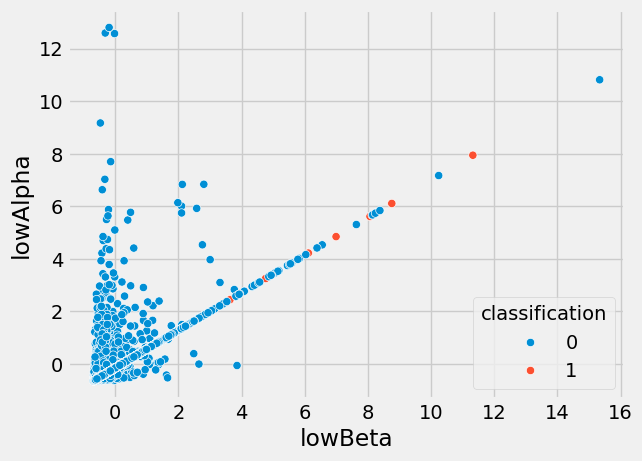

In [22]:
# @title Low Beta vs Low Alpha
sns.scatterplot(x = driving.lowBeta, y = driving.lowAlpha, hue = driving.classification)

When we look at the graph, we see that Low Alpha and Low Beta have a positive association/ relationship. If we find the correlation coefficient, we see that it is 0.69. This is a stronger correlation that we saw in question 2. There is a association between when a person is not mentally active and not actively thinking.

In [23]:
#Correlation between High Beta and Theta
driving['lowBeta'].corr(driving['lowAlpha'])

0.6931826381686367

If we want to see what the number of sleepy vs. attentive classifications represented in this scatter plot, we can group by the classification and count the number. We see that the count distribution down below. It makes sense that a driver would be sleepy than attentive if the brain is not mentally active or axiously thinking.

In [24]:
comparison = driving[['lowBeta', 'lowAlpha', 'classification']]
count = comparison.groupby('classification').count()
count

,lowBeta,lowAlpha
classification,,
0,2135,2135
1,1600,1600


#Question 4: Hypothesis Test

The question we asked is if drivers classified as sleepy have higher High Alpha Waves then drivers who are Attentive. In order to answer this question, we need to conduct a hypothesis test. In our hypothesis test, we need to determine the null and alternative hypothesis.

We know that Alpha waves are present during physically and mentally relaxed states but still alert. They are typical in wakeful states that involve a relaxed and effortless alertness. Alpha waves aid in mental coordination, calmness, alertness, and learning.

Therefore, if a driver has high alpha waves they are more relaxed. Therefore, the following will be my null hypothesis and alternative hypothesis.

Null hypothesis: the distribution of High Alpha Waves is the same regardless if a driver is labeled as sleepy or attentive. The difference in the sample is due to chance.

Alternative hypothesis: The drivers who are classified as sleepy have a lower high alpha waves, on average, than drivers classified as attentive.


We must find the test statistic of one difference in mean in high alpha waves. In order to do this, we need to create a new dataframe that only has the Classification and High Alpha column.

In [25]:
classify_highAlpha = driving[['classification', 'highAlpha']]
classify_highAlpha

,classification,highAlpha
0,0,27356
1,0,39551
2,0,13564
3,0,34254
4,0,47349
...,...,...
3730,0,1701
3731,0,15432
3732,0,15326
3733,0,49406


We can plot how the high alpha waves are distributed and how they are currently classified.

Text(0, 0.5, 'High Alpha Value')

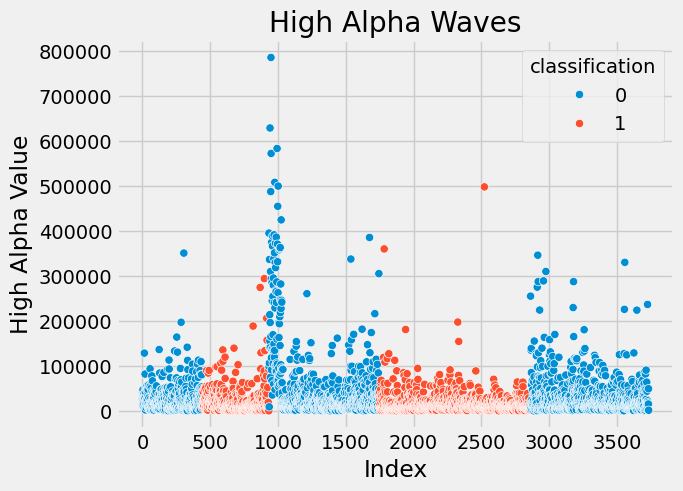

In [26]:
# @title highAlpha

sns.scatterplot(data=classify_highAlpha, x=classify_highAlpha.index, y='highAlpha', hue='classification')
plt.title('High Alpha Waves')
plt.xlabel('Index')
plt.ylabel('High Alpha Value')
#classify_highAlpha['highAlpha'].plot(kind='line', figsize=(8, 4), title='highAlpha')

Now we can use the grouby function to group based on classification to find the mean of each of the drivers who are sleepy and mean of drivers who are attentive.

In [27]:
avg_highAlpha_class = classify_highAlpha.groupby('classification').mean()
avg_highAlpha_class

,highAlpha
classification,
0,39286.974239
1,18963.403125


Then, we can get the difference of means between drivers who are labeled as sleepy and drivers who are labeled as attentive. This difference will be our observed test statistic. Notice that our the average of attentive - average of sleepy = -20323, which favors our null, however, let us see if this holds when we shuffle the labels and sitimulate several repetitions. When we shuffle the labels we will add a column to classify_highAlpha with the shuffled label as a new column.

In [28]:
# Get the means column from the means_table
means = avg_highAlpha_class.groupby('classification')['highAlpha'].mean()

observed_difference = means.iloc[1] - means.iloc[0]
observed_difference

-20323.571113875874

In [29]:
def difference_of_means(data, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean high alpha waves of the two groups"""
    means = data.groupby(group_label)['highAlpha'].mean()

    # Calculate the difference of means
    return means.iloc[1] - means.iloc[0]

In [30]:
#Shuffled the labels
shuffled_labels = np.random.choice([0, 1], size=len(classify_highAlpha), replace=True)
classify_highAlpha['Shuffled Label'] = shuffled_labels
classify_highAlpha

<ipython-input-30-676237b1a16f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_highAlpha['Shuffled Label'] = shuffled_labels


,classification,highAlpha,Shuffled Label
0,0,27356,0
1,0,39551,0
2,0,13564,1
3,0,34254,1
4,0,47349,0
...,...,...,...
3730,0,1701,1
3731,0,15432,1
3732,0,15326,1
3733,0,49406,1


Now, before we stimulate repetitions of difference of means of high alpha waves, let us plot the scatterplot of the high alpha waves based on the shuffled labels.

Text(0, 0.5, 'High Alpha Value')

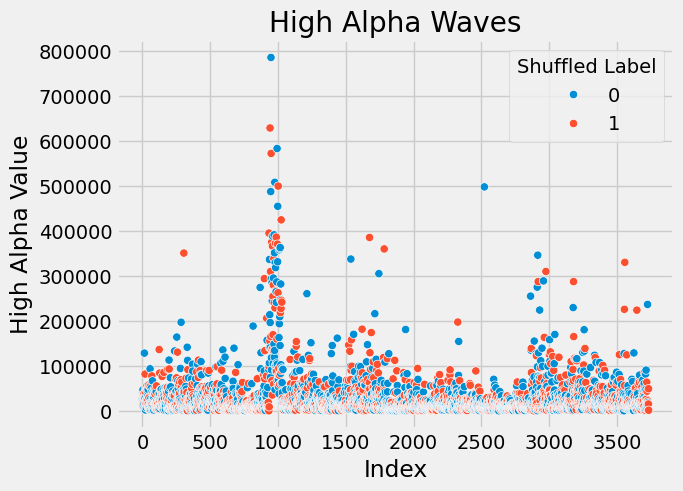

In [31]:
# @title highAlpha

sns.scatterplot(data=classify_highAlpha, x=classify_highAlpha.index, y='highAlpha', hue='Shuffled Label')
plt.title('High Alpha Waves')
plt.xlabel('Index')
plt.ylabel('High Alpha Value')
#classify_highAlpha['highAlpha'].plot(kind='line', figsize=(8, 4), title='highAlpha')

Now, let us just take the columns shuffled label and highAlpha and group by the shuffled labels to find the mean. Once we do this, we can create a function to stimulate the difference of high alpha means and use this function to create multiple repetitions of difference of means.

In [32]:
shuffle_only = classify_highAlpha[['highAlpha', 'Shuffled Label']]
shuffle_group_means = shuffle_only.groupby('Shuffled Label').mean()
shuffle_group_means

,highAlpha
Shuffled Label,
0,31820.666493
1,29274.732270


In [33]:
difference_of_means(shuffle_group_means, 'Shuffled Label')

-2545.934222214826

In [34]:
def one_simulated_difference_of_means():
    # Shuffling labels
    shuffled_labels = classify_highAlpha['classification'].sample(frac=1, replace=False).reset_index(drop=True)
    classify_highAlpha['Shuffled Label'] = shuffled_labels
    shuffle_only = classify_highAlpha[['highAlpha', 'Shuffled Label']]
    shuffle_group_means = shuffle_only.groupby('Shuffled Label').mean()
    difference = difference_of_means(shuffle_group_means, 'Shuffled Label')
    return difference

In [35]:
one_simulated_difference_of_means()

<ipython-input-34-75c370131b30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_highAlpha['Shuffled Label'] = shuffled_labels


-1266.404951697892

In [36]:
differences = []
repetitions = 5000
for i in range(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences.append(new_difference)

differences = pd.Series(differences)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_highAlpha['Shuffled Label'] = shuffled_labels
<ipython-input-34-75c370131b30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_highAlpha['Shuffled Label'] = shuffled_labels
<ipython-input-34-75c370131b30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classify_highAlpha['Shuffled Label'] = shuffled_

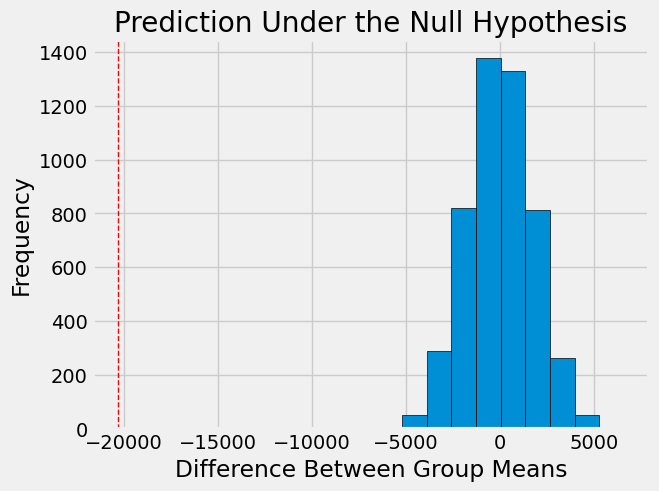

Observed Difference: -20323.571113875874


In [37]:
difference_means = pd.DataFrame({'Difference Between Group Means': differences})

# Plot a histogram
plt.hist(difference_means['Difference Between Group Means'], bins=10, edgecolor='black')
plt.title('Prediction Under the Null Hypothesis')
plt.xlabel('Difference Between Group Means')
plt.ylabel('Frequency')
plt.axvline(observed_difference, color='r', linestyle='dashed', linewidth=1)  # Add a vertical line for observed difference
plt.show()

print('Observed Difference:', observed_difference)

The conclusion of the test is that the data favor the alternative over the hypothesis. It supports the hypothesis that the average high alpha waves for drivers who are sleepy is lower than the average high alpha waves for drivers who are attentive. Notice that the p-value is 0.0, which is less than 0.05; therefore, we can reject the null that there is no difference in average high values.

In [38]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

#Question 5: Classification

In our next research question, we are asked to determine how accurately can you classify whether a driver is Sleepy or Attentive with the dataset provided. In order to do this, we need to break our dataset into training and test sets. I want to break my data into 3500 training values so we can test 235. I will be conducting two classification test. First, we will be doing Naive Bayes and then we will be doing K Nearest Neighbor.

In [39]:
#Splits the dataset into training and test values
X_train, X_test, y_train, y_test = train_test_split(
    driving.drop(columns=['classification']),  # Features
    driving['classification'],  # Target variable
    train_size=3500,  # Number of training samples
    random_state=0)

In [40]:
#Number of train and test values
print(f'Training values: {len(y_train)} \nTesting values: {len(y_test)}')

Training values: 3500 
Testing values: 235


In [41]:
# Initialize a Gaussian Naive Bayes model and trains the model on the training data to make predictions on the test
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)

#Calculate the accuracy of the model
accuray = accuracy_score(y_pred, y_test)

#The f1 measures the precision and the recall (true positive predictions to the total number of actual positive instances in the dataset)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.5574468085106383
F1 Score: 0.5838789971103503


We see above that our accuracy level in classifying whether a driver is Sleepy or Attentive was around 56%, which is not too accurate.

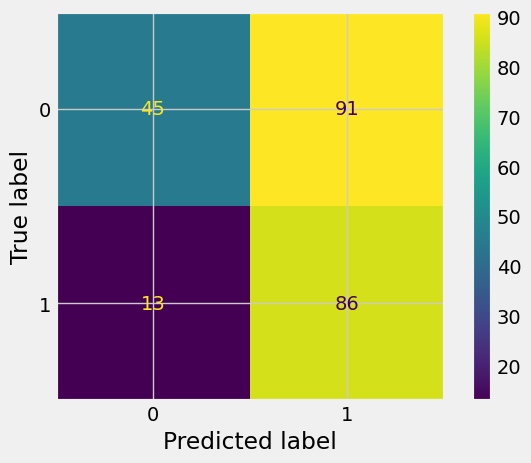

In [42]:
labels = [0,1]
#Calculate the confusion matrix based on the true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred, labels=labels)

## Create a ConfusionMatrixDisplay object with the calculated confusion matrix and display labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Looking at the CONFUsion Matrix Display, we can compare the true label with the predicted labels. For example, if the True label is 1 and Predicted label matches, then the label is accurately depicted. However, if the true label and predicted label does not match, we see that there is a false label, sort of like false negative or false positive values.

Let use try if a K Nearset Neighbor test is better in this case. I researched what type is makes the most sense and I choose to evaluate the cross value score. Look at the comments to understand how the code is broken down to conducts this test.

In [43]:
#Features (X) and target variable (y)
X = driving.drop('classification', axis=1)
y = driving['classification']

#Define a list of k values for KNN and a list to store cross-validation scores
k_values = [i for i in range (1,31)]
scores = []

#Standardize the X using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Perform k-fold cross-validation for each k value
for k in k_values:
# Initialize KNN classifier with the current k value and conducts cross-validation with 5 folds to calculate the mean score
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

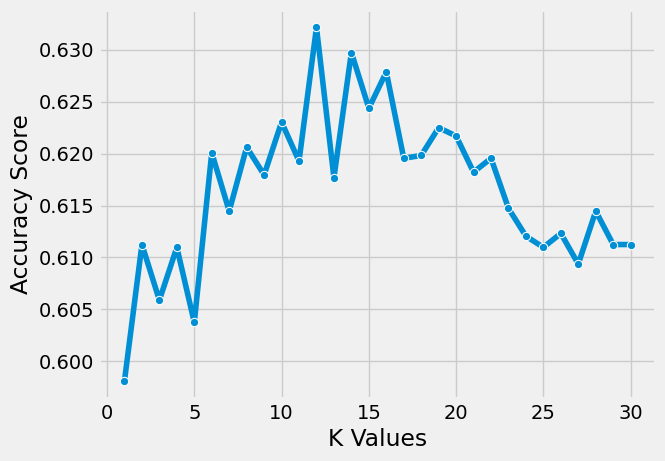

In [44]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [45]:
#Find the index of the maximum score in the scores list and gets the corresponding best k value using the index
best_index = np.argmax(scores)
best_k = k_values[best_index]

## Initialize a KNN classifier with the best k value and trains
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [46]:
#Predicts based on the test data using the trained KNN classifier
y_pred = knn.predict(X_test)

# Calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6978723404255319
Precision: 0.6666666666666666
Recall: 0.5656565656565656


Notice that when we conducted cross-validation with KNN clasification and then based on the best k-values conducted the KNN classification test, we could classify whether a driver is sleepy or attentive around 70% of accuracy. This is much better than the 56% we got by doing the Naive Bayes Classifer.

#Conclusion:

Based on the analysis we conducted, we discovered the following:

*1. We discovered the strongest correlations  of 0.69 are between Low Alpha vs. Low Beta and Low Beta vs. Low Alpha. The lowest correlation of 0.0067 are between Attention vs. High Beta and Low Beta vs. Attention.*

*2. There is a positive association/relationship between High Beta and Theta. The correlation between them is 0.66*

*3. We see that Low Alpha and Low Beta have a positive association/ relationship, with a correlation of 0.69.*

*4. The conclusion of the hypothesis test is that the data favor the alternative over the hypothesis. It supports the hypothesis that the average high alpha waves for drivers who are sleepy is lower than the average high alpha waves for drivers who are attentive.*

*5. According to the KNN CLassifer test, we can correctly classify whether a driver is attentive or sleepy with 71% accuracy.*

Therefore, with this dataset, we could analyze various driving behavior relationships and determine if the classification tests done could determine could predict whether a driver is attentive or sleepy.